In [1]:
import torch
import matplotlib.pyplot as plt

def zeroth_order_terms(V, alpha, beta, L, R, z1, z2):
     # Convert non-tensor variables to PyTorch tensors
    V = torch.tensor(V)
    alpha = torch.tensor(alpha)
    beta = torch.tensor(beta)
    L = torch.tensor(L)
    R = torch.tensor(R)
    z1 = torch.tensor(z1)
    z2 = torch.tensor(z2)
    
    c10a = (1/z1) * ((1 - alpha) * L + alpha * R)
    c20a = (-z1/z2) * c10a
    c10b = (1/z1) * ((1 - beta) * L + beta * R)
    c20b = (-z1/z2) * c10b
    phi0a = V * (torch.log(((1 - alpha) * L + alpha * R)) - torch.log(R)) / (torch.log(L) - torch.log(R))
    phi0b = V * (torch.log(((1 - beta)  * L + beta * R)) - torch.log(R)) / (torch.log(L) - torch.log(R))
    y0 = ((1.0 / ((z1 - z2) * (L - R))) * torch.log(((1 - alpha) * L + alpha * R) / ((1 - beta) * L + beta * R)))
    J10 = ((L - R) / (z1 * (torch.log(L) - torch.log(R)))) * (z1 * V + torch.log(L) - torch.log(R))
    J20 = ((R - L) / (z2 * (torch.log(L) - torch.log(R)))) * (z2 * V + torch.log(L) - torch.log(R))
    return c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20

In [2]:
def first_order_terms(V, alpha, beta, L, R, z1, z2):
     # Convert non-tensor variables to PyTorch tensors
    V = torch.tensor(V)
    alpha = torch.tensor(alpha)
    beta = torch.tensor(beta)
    L = torch.tensor(L)
    R = torch.tensor(R)
    z1 = torch.tensor(z1)
    z2 = torch.tensor(z2)
    
    c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V, alpha, beta, L, R, z1, z2)
    c11a = (z2 * alpha * (phi0b - phi0a) / (z1 - z2)) - (1 / (2 * (z1 - z2)))
    c21a = (z1 * alpha * (phi0b - phi0a) / (z2 - z1)) - (1 / (2 * (z2 - z1)))
    c11b = (z2 * (1 - beta) * (phi0a - phi0b) / (z1 - z2)) - (1 / (2 * (z1 - z2)))
    c21b = (z1 * (1 - beta) * (phi0a - phi0b) / (z2 - z1)) - (1 / (2 * (z2 - z1)))
    c1L  = L / z1
    c1R  = R / z1
    T0   =   J10 +  J20

    A = -((beta - alpha) * (L - R) ** 2) / (((1 - alpha) * L + alpha * R) * ((1 - beta) * L + beta * R) * (torch.log(L) - torch.log(R)))
    B = ( torch.log(((1 - beta) * L + beta * R)) - torch.log(((1 - alpha) * L + alpha * R))  ) / A

    lambda_val = V / (torch.log(L) - torch.log(R))
    phi1a = ((1 + z1 * lambda_val) * (1 + z2 * lambda_val) * (c10b - c10a) * (torch.log(c1L) - torch.log(c10a))) / (z1 * (z1 - z2) * c10a * c10b * (torch.log(c1R) - torch.log(c1L))) \
                  + (1 / (2 * z1 * (z1 - z2) * c10a)) + (lambda_val * ((z2 * alpha * (phi0b - phi0a)) / ((z1 - z2) * c10a) ) )
    phi1b = ((1 + z1 * lambda_val) * (1 + z2 * lambda_val) * (c10b - c10a) * (torch.log(c1R) - torch.log(c10b))) / (z1 * (z1 - z2) * c10a * c10b * (torch.log(c1R) - torch.log(c1L))) \
                  + (1 / (2 * z1 * (z1 - z2) * c10b)) + (lambda_val * ((z2 * (1 - beta) * (phi0a - phi0b)) / ((z1 - z2) * c10b) ) )
    y1 = (((1 - beta) * c1L + alpha * c1R) * (phi0a - phi0b)) / (z1 * (z1 - z2) * T0 * c10a * c10b) \
           + ((torch.log(c10a) - torch.log(c10b)) * (phi0a - phi0b)) / (z1 * (z1 - z2) * T0 * (c1L - c1R)) \
            - (((z2 * J10 + z1 * J20) * (c10a - c10b)) / (z1 ** 2 * z2 * (z1 - z2) * T0 ** 2 * c10a * c10b))
    J11 = ( (A * (z2 * (1 - B) * V + torch.log(L) - torch.log(R))) / ((z1 - z2) * (torch.log(L) - torch.log(R))**2) ) * (z1 * V + torch.log(L) - torch.log(R))
    J21 = ( (A * (z1 * (1 - B) * V + torch.log(L) - torch.log(R))) / ((z2 - z1) * (torch.log(L) - torch.log(R))**2) ) * (z2 * V + torch.log(L) - torch.log(R))

    return c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21

In [3]:
def calculate_voltage_ranges(L, R):
    alpha = 1/3
    beta = 2/3
    z1 = 1
    z2 = -1
    
     # Convert L and R to PyTorch tensors
    L = torch.tensor(L)
    R = torch.tensor(R)


    A = -((beta - alpha) * (L - R) ** 2) / (((1 - alpha) * L + alpha * R) * ((1 - beta) * L + beta * R) * (torch.log(L) - torch.log(R)))
    B = ( torch.log(((1 - beta) * L + beta * R)) - torch.log(((1 - alpha) * L + alpha * R))  ) / A

    Vq1 = (torch.log(R) - torch.log(L)) / (z2 * (1 - B))
    Vq2 = (torch.log(R) - torch.log(L)) / (z1 * (1 - B))

    Vqmin = torch.min(Vq1, Vq2)
    Vqmax = torch.max(Vq1, Vq2)

    V1_range = torch.linspace(Vqmin-80, Vqmin, 200)
    V2_range = torch.linspace(Vqmin, Vqmax, 200)
    V3_range = torch.linspace(Vqmax, Vqmax+80, 200)

    return alpha, beta, z1, z2, V1_range, V2_range, V3_range

In [4]:
# Utilize GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move tensors to GPU if available
def to_device(tensor):
    return tensor.to(device)

/tmp/ipykernel_27/3450909754.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  V = torch.tensor(V)
/tmp/ipykernel_27/3297110126.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  V = torch.tensor(V)
/tmp/ipykernel_27/3450909754.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  alpha = torch.tensor(alpha)
/tmp/ipykernel_27/3450909754.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  

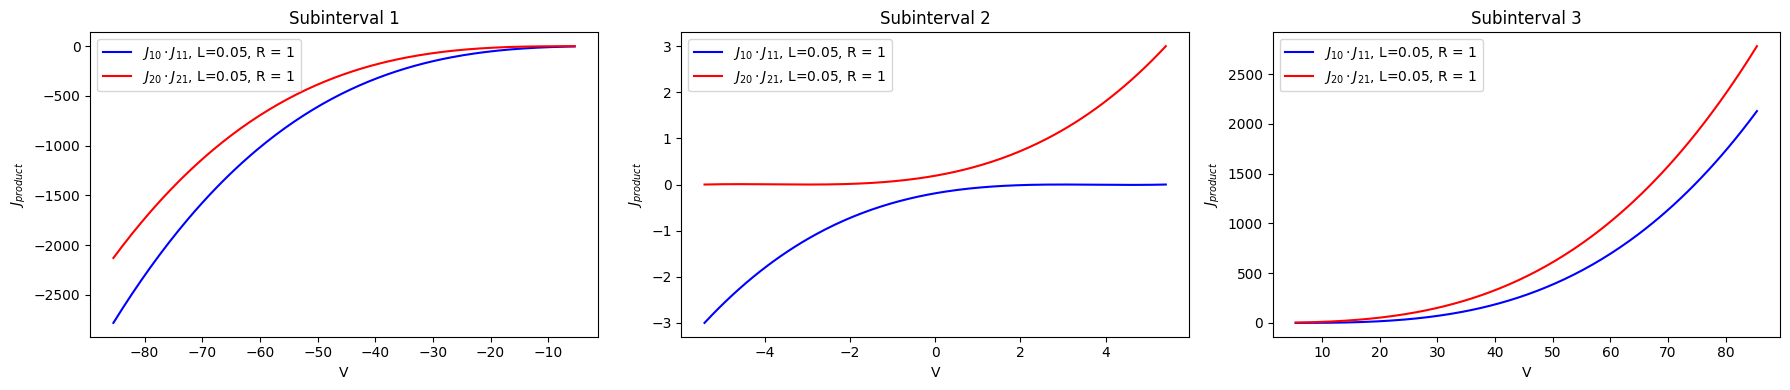

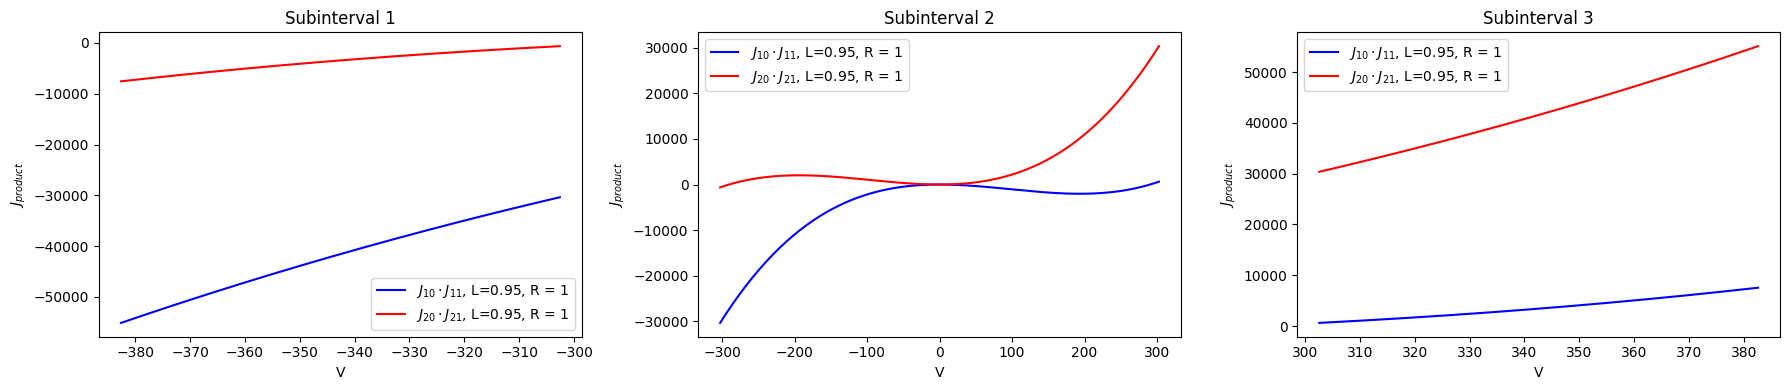

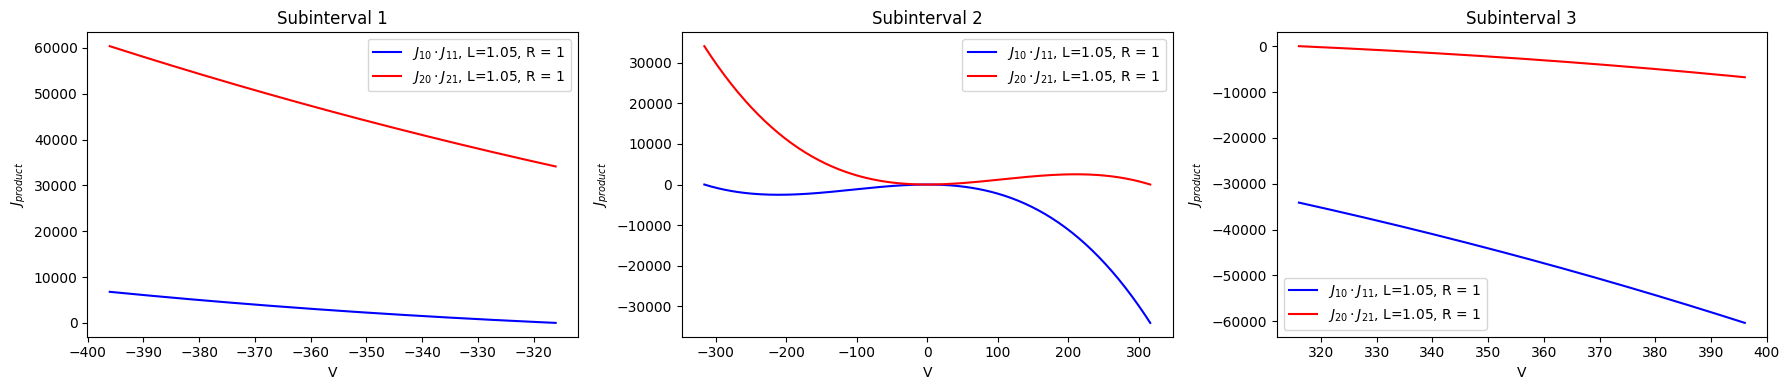

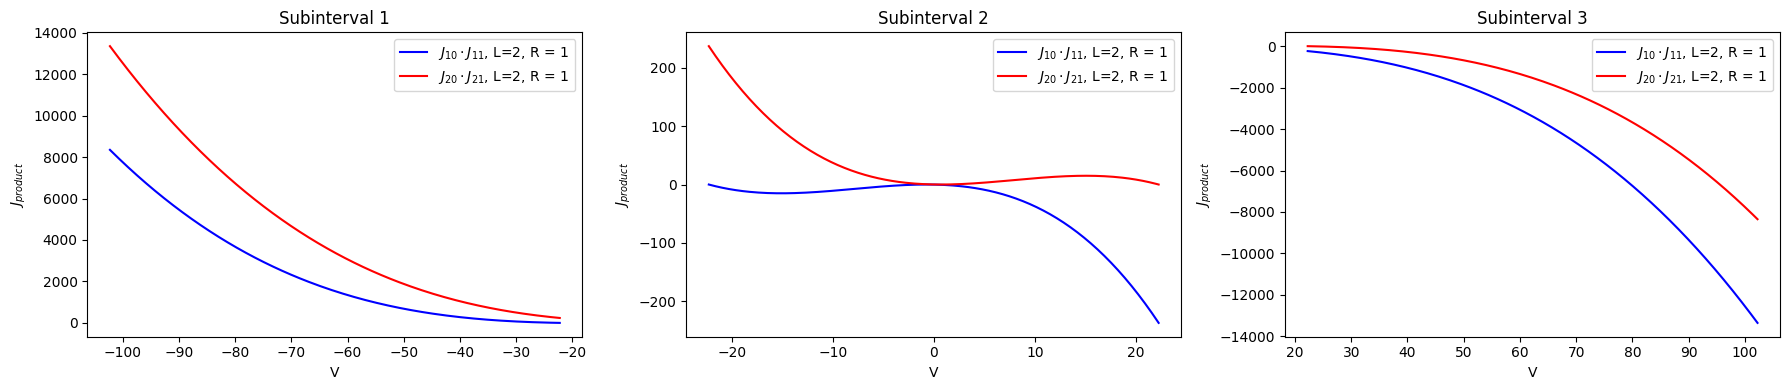

In [5]:
# Define the parameter values
R = 1
for L in [0.05,  0.95, 1.05,  2]:
    alpha, beta, z1, z2, V1_range, V2_range, V3_range = calculate_voltage_ranges(L, R)

    # Create a list of V ranges
    V_ranges = [V1_range, V2_range, V3_range]

    # Iterate over the ranges and call zeroth_order_terms
    fig, axs = plt.subplots(1, 3, figsize=(18, 4))
    mag = 0

    # Iterate over the ranges and call zeroth_order_terms
    for i, V_range in enumerate(V_ranges, 1):
        # Move V_range to GPU if available
        V_range = to_device(V_range)

        c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
        c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)
        Q = 0.01
        J1_prd = J10 * J11
        J2_prd = J20 * J21

        # Plot on the corresponding subplot
        axs[i-1].plot(V_range.cpu().numpy(), J1_prd.cpu().numpy(), color='blue', label=f'$J_{{10}} \cdot J_{{11}}$, L={L}, R = {R}')
        axs[i-1].plot(V_range.cpu().numpy(), J2_prd.cpu().numpy(), color='red', label=f'$J_{{20}} \cdot J_{{21}}$, L={L}, R = {R}')
        axs[i-1].set_title(f'Subinterval {i}')
        axs[i-1].set_xlabel('V')
        axs[i-1].set_ylabel('$J_{{product}}$')
        axs[i-1].legend()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Display the figure
    plt.show()


/tmp/ipykernel_27/3450909754.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  V = torch.tensor(V)
/tmp/ipykernel_27/3297110126.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  V = torch.tensor(V)
/tmp/ipykernel_27/3450909754.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  alpha = torch.tensor(alpha)
/tmp/ipykernel_27/3450909754.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  

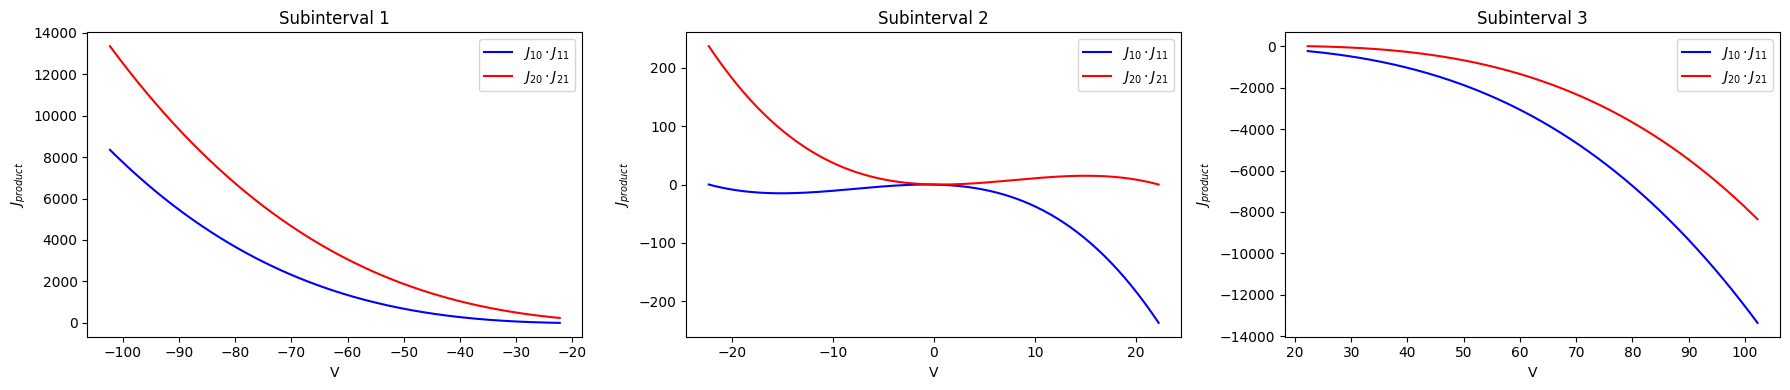

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt

L = 2
R = 1

# Define V range
V_range = torch.linspace(-500, 500, int(1e7))  # Adjust the number of points as needed
alpha, beta, z1, z2, V1_range, V2_range, V3_range = calculate_voltage_ranges(L, R)

# Calculate zeroth and first order terms
c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)

# Calculate product terms
J1_prd2 = J10 * J11
J2_prd2 = J20 * J21

# Find indices of zero values in J1_prd2 and J2_prd2
epsilon = 1e-3  # Adjust this value as needed
zero_indices1 = torch.where(torch.isclose(J1_prd2, torch.tensor(0.0), atol=epsilon))[0].cpu().numpy()
zero_indices2 = torch.where(torch.isclose(J2_prd2, torch.tensor(0.0), atol=epsilon))[0].cpu().numpy()

# Identify consecutive indices and keep one element per consecutive sequence
def keep_one_per_consecutive(indices):
    result_indices = []
    i = 0
    while i < len(indices):
        j = i + 1
        while j < len(indices) and indices[j] == indices[j - 1] + 1:
            j += 1
        result_indices.append(indices[i + (j - i) // 2])
        i = j
    return np.array(result_indices)

# Keep one element per consecutive sequence in zero_indices1 and zero_indices2
zero_indices1 = keep_one_per_consecutive(zero_indices1)
zero_indices2 = keep_one_per_consecutive(zero_indices2)

# Get corresponding values of t for zero values in J1_prd2 and J2_prd2
V_zero_values1 = V_range[zero_indices1].cpu().numpy()
V_zero_values2 = V_range[zero_indices2].cpu().numpy()

# Combine the zero values
V_combined = np.concatenate([V_zero_values1, V_zero_values2])

# Rearrange to have V_zero
V_zero = np.sort(V_combined)

# Find the length of V_zero
lng = len(V_zero)

# Create subintervals using np.linspace
if len(V_zero) > 0:
    subintervals = [
        torch.linspace(V_zero[0]-80, V_zero[0], 200).cpu().numpy()
    ] + [
        torch.linspace(V_zero[i], V_zero[i + 1], 200).cpu().numpy() for i in range(lng - 1)
    ] + [
        torch.linspace(V_zero[-1], V_zero[-1]+80, 200).cpu().numpy()
    ]
else:
    subintervals = [V_range[0].cpu().numpy(), V_range[-1].cpu().numpy()]

# Check the signs of J1_prd2 and J2_prd2 at the midpoints of subintervals
midpoints = [np.mean(interval) for interval in subintervals]
signs_J1_prd2 = np.sign(J10 * J11).cpu().numpy()
signs_J2_prd2 = np.sign(J20 * J21).cpu().numpy()

# Check and remove points where both J1_prd2 and J2_prd2 have the same sign across consecutive subintervals
new_V_zero = [V_zero[0]]
for i in range(1, len(V_zero) - 1):
    idx = np.searchsorted(midpoints, V_zero[i])
    if signs_J1_prd2[idx] != signs_J1_prd2[idx - 1] or signs_J2_prd2[idx] != signs_J2_prd2[idx - 1]:
        new_V_zero.append(V_zero[i])
new_V_zero.append(V_zero[-1])

# Update V_zero
V_zero = np.array(new_V_zero)

# Update the length of V_zero
lng = len(V_zero)

# Create new subintervals using np.linspace
if len(V_zero) > 0:
    subintervals = [
        torch.linspace(V_zero[0]-80, V_zero[0], 200).cpu().numpy()
    ] + [
        torch.linspace(V_zero[i], V_zero[i + 1], 200).cpu().numpy() for i in range(lng - 1)
    ] + [
        torch.linspace(V_zero[-1], V_zero[-1]+80, 200).cpu().numpy()
    ]
else:
    subintervals = [V_range[0].cpu().numpy(), V_range[-1].cpu().numpy()]

# Plot J1_prd2 and J2_prd2 on subintervals
fig, axs = plt.subplots(1, lng + 1, figsize=(18, 4))

for i, interval in enumerate(subintervals):
    interval_range = interval
    c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(interval_range, alpha, beta, L, R, z1, z2)
    c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(interval_range, alpha, beta, L, R, z1, z2)

    J1_prd22 = J10 * J11
    J2_prd22 = J20 * J21

    axs[i].plot(interval_range, J1_prd22.cpu().numpy(), color='blue', label=f'$J_{{10}} \cdot J_{{11}} $')
    axs[i].plot(interval_range, J2_prd22.cpu().numpy(), color='red', label=f'$J_{{20}} \cdot J_{{21}} $')
    axs[i].set_title(f'Subinterval {i + 1}')
    axs[i].set_xlabel('V')
    axs[i].set_ylabel('$J_{product}$')
    axs[i].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


/tmp/ipykernel_27/525592672.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  L = torch.tensor(L)
/tmp/ipykernel_27/525592672.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  R = torch.tensor(R)
/tmp/ipykernel_27/3450909754.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  V = torch.tensor(V)
/tmp/ipykernel_27/3450909754.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  R = torch

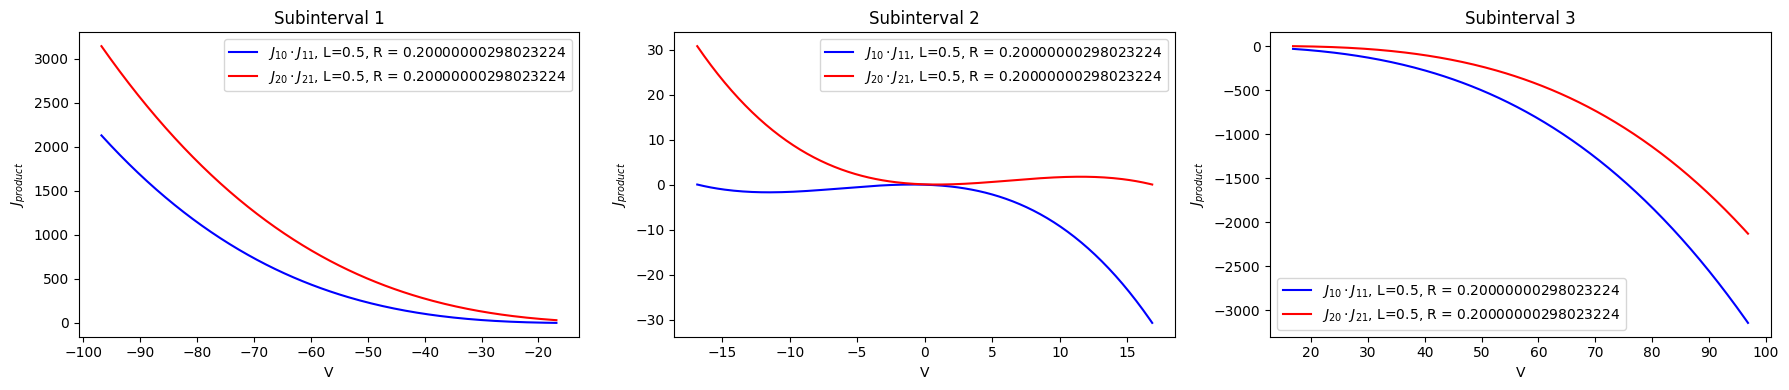

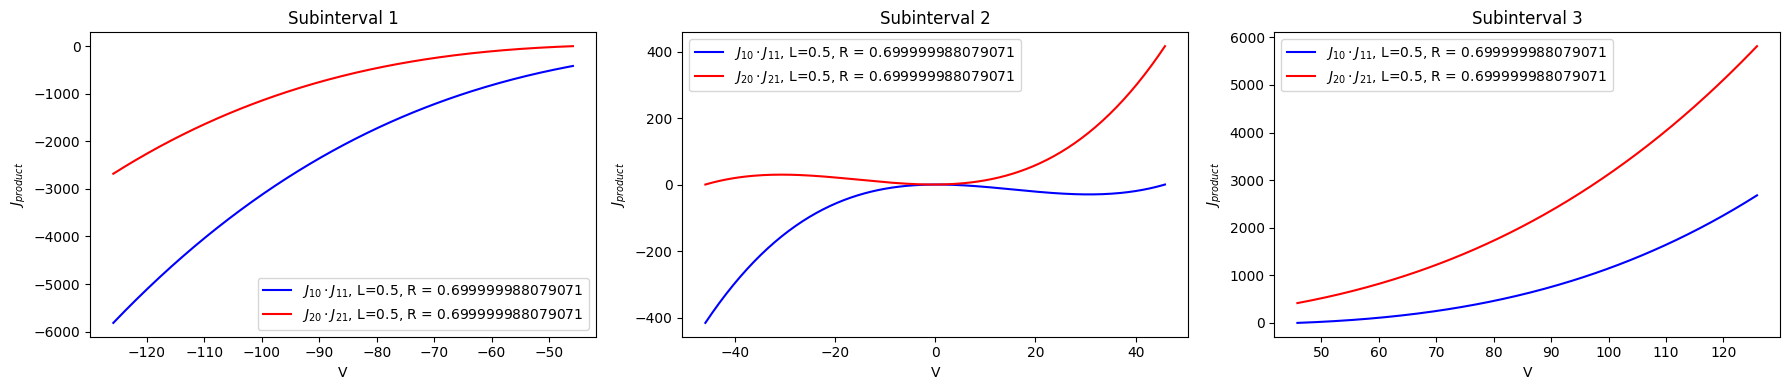

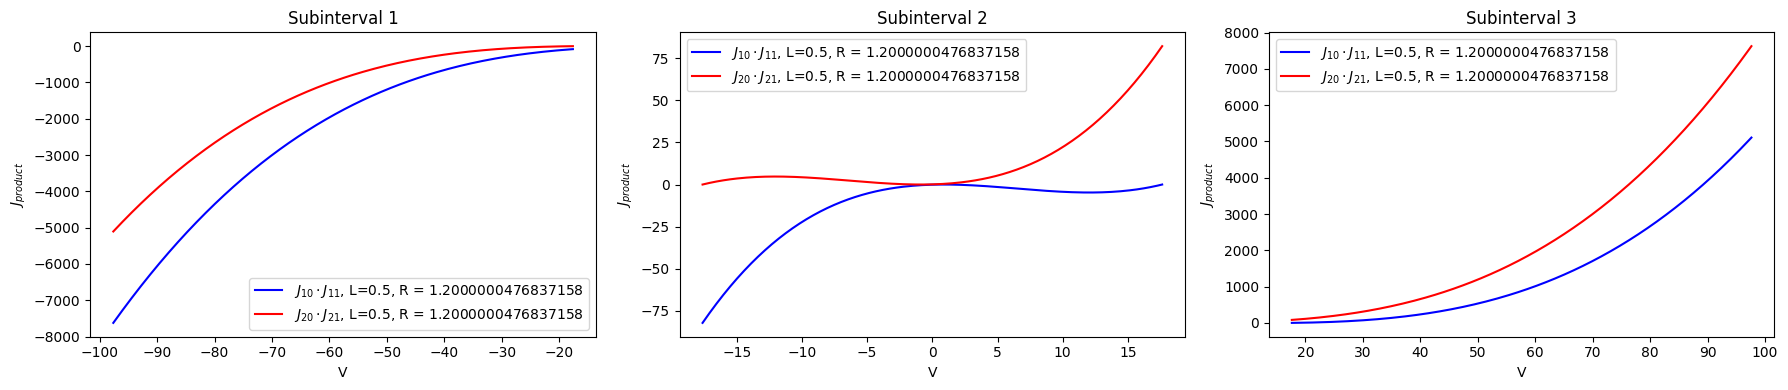

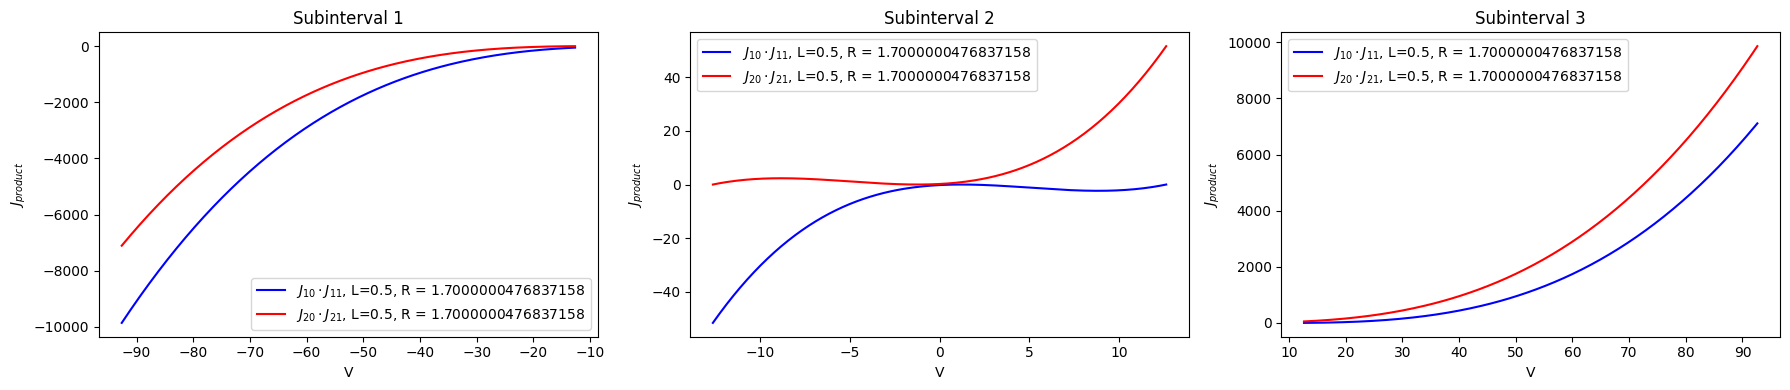

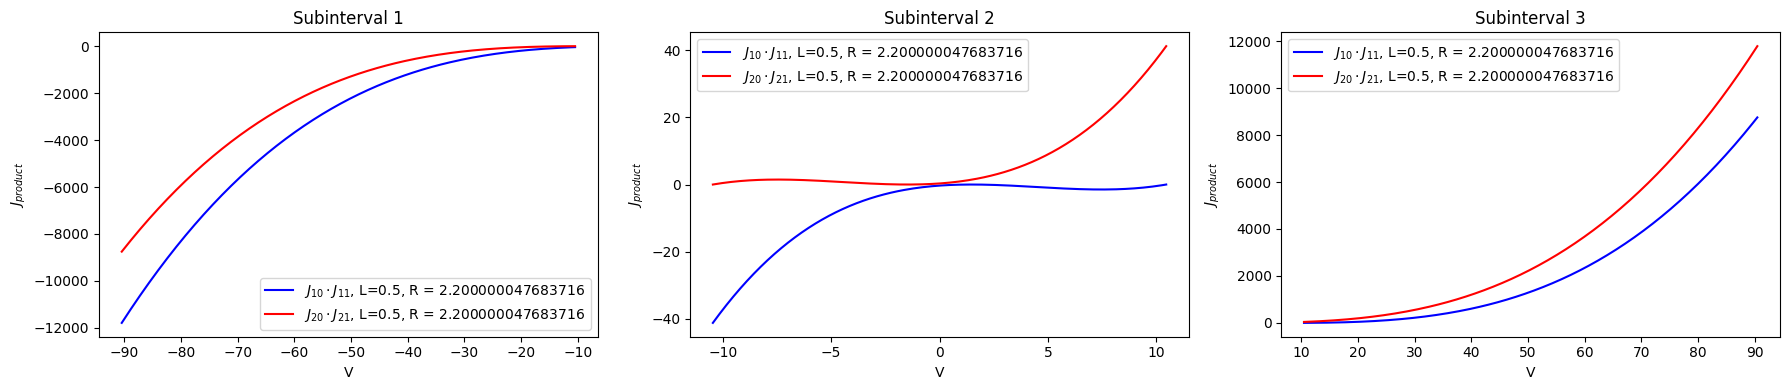

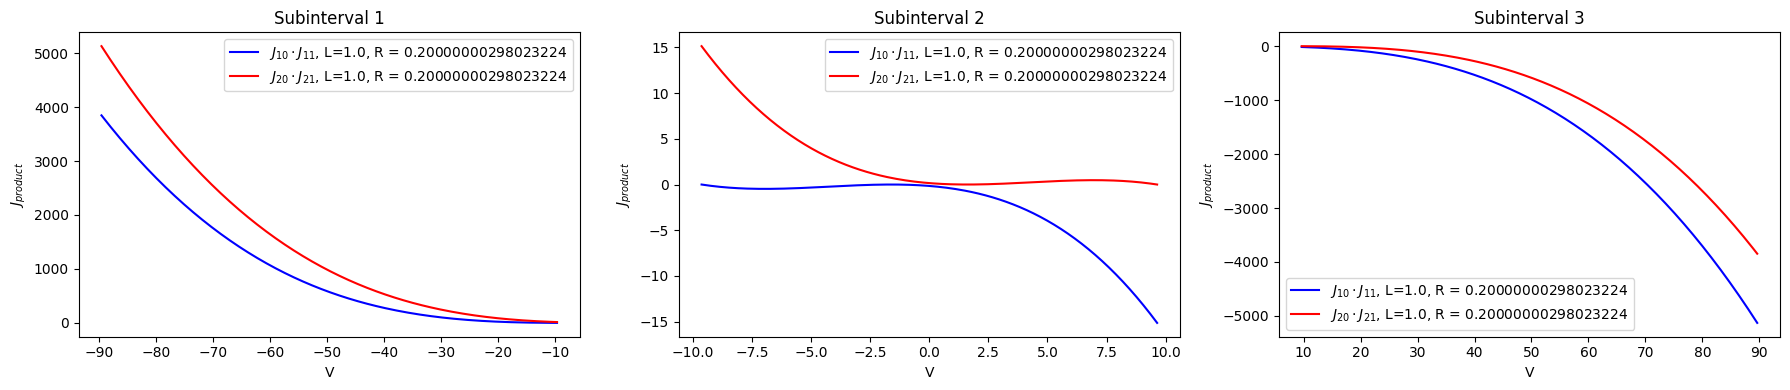

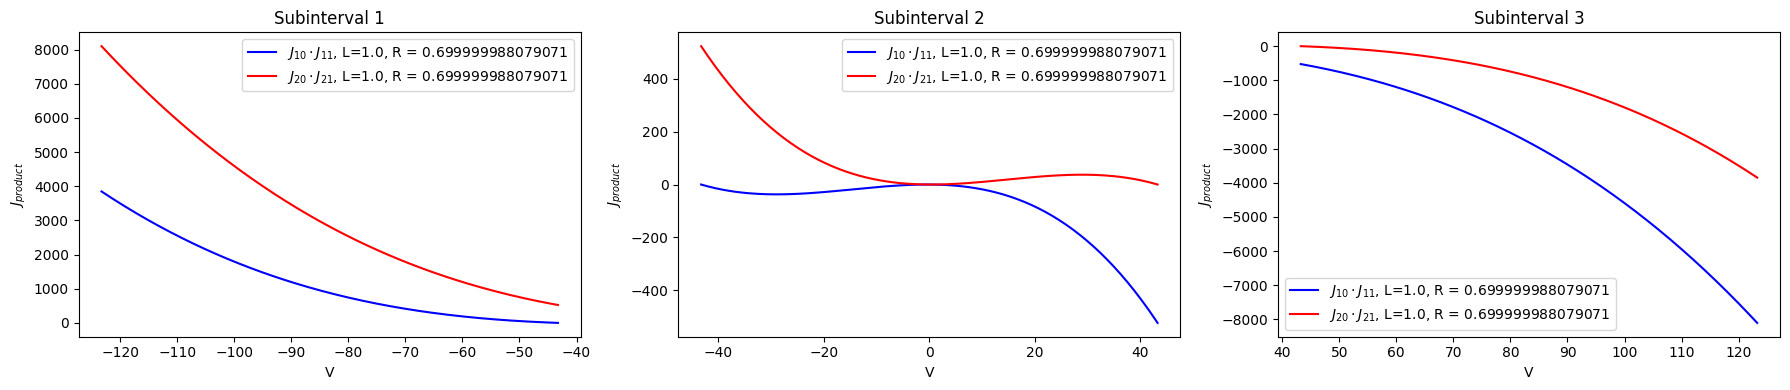

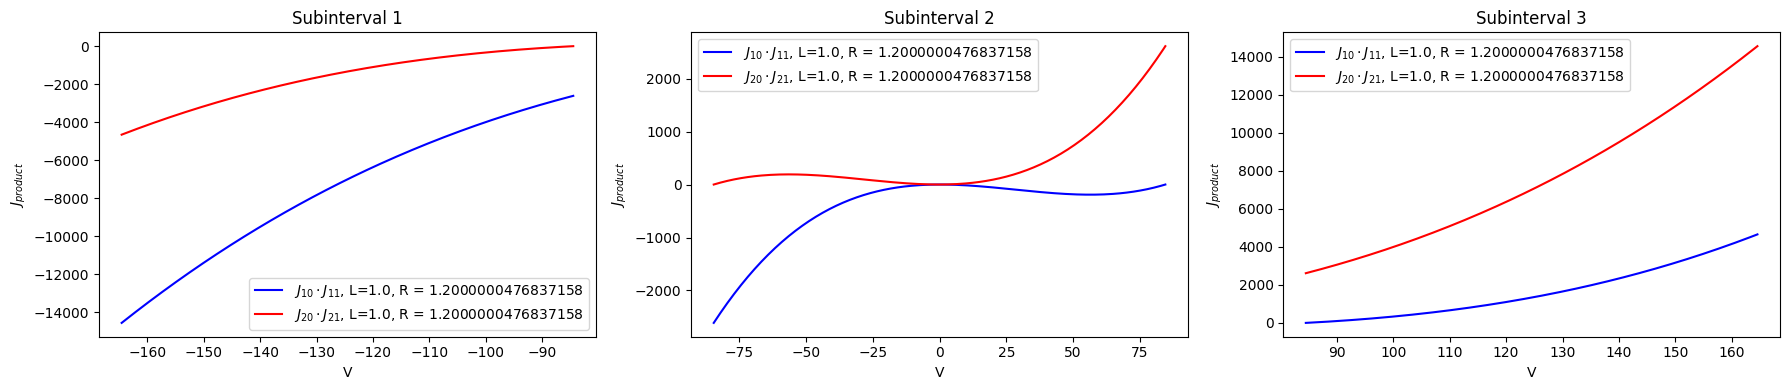

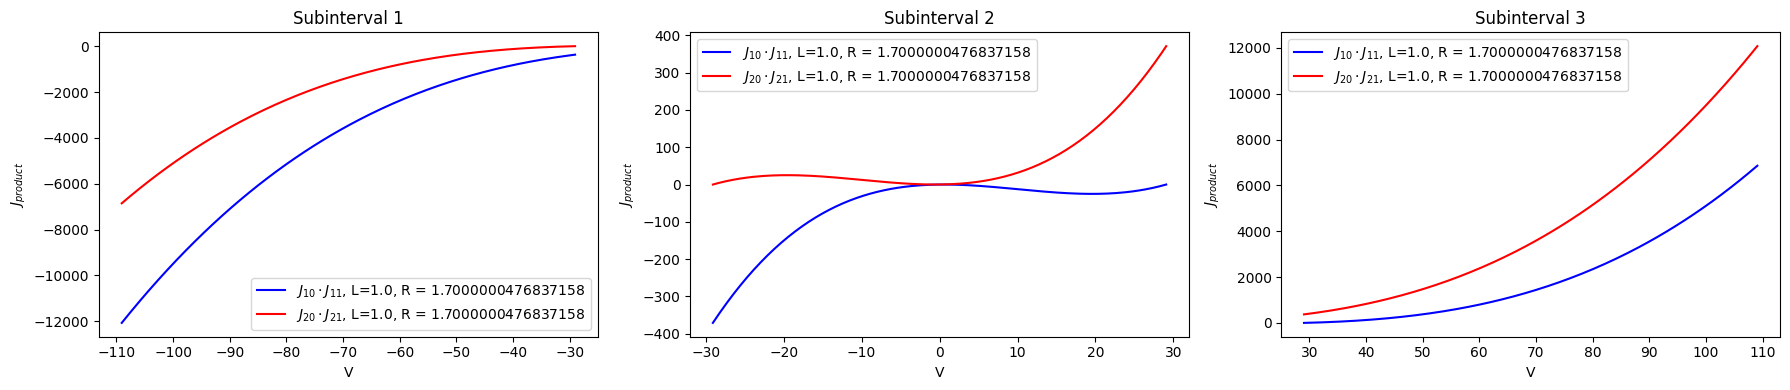

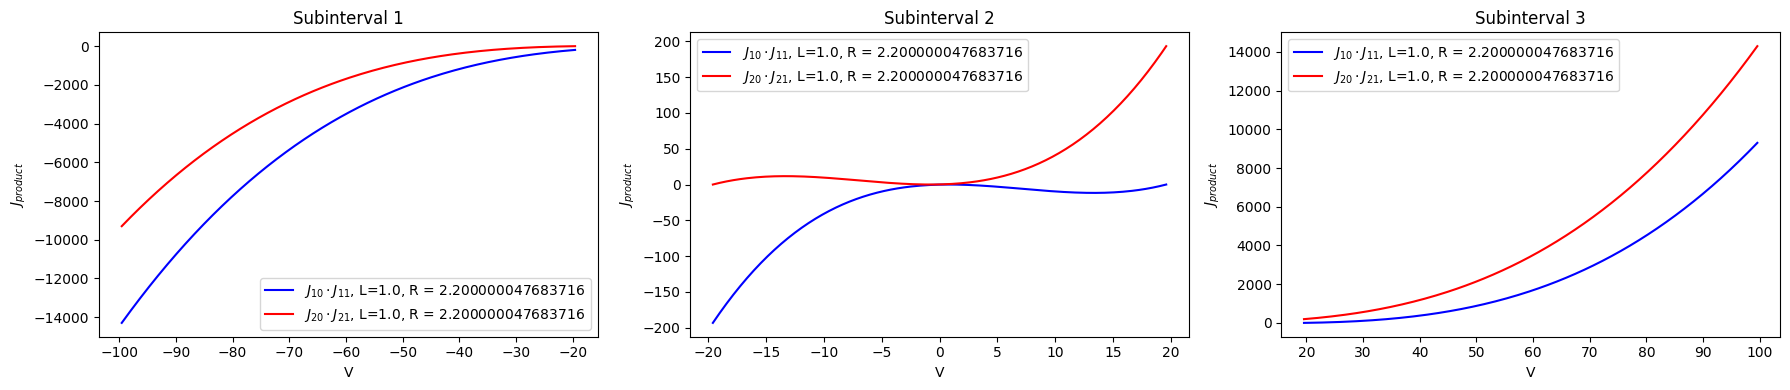

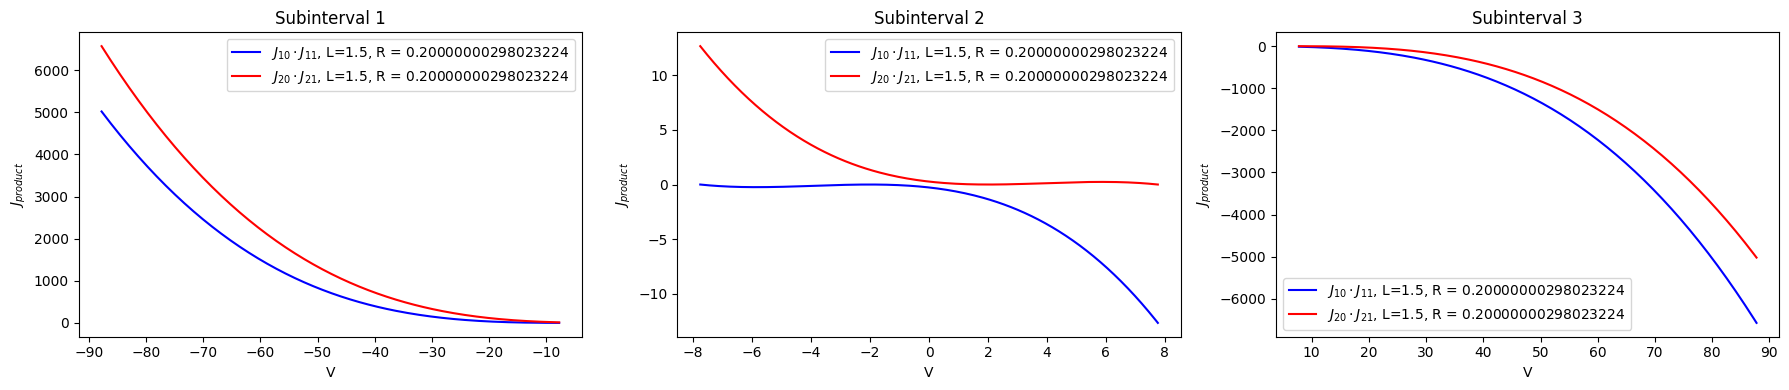

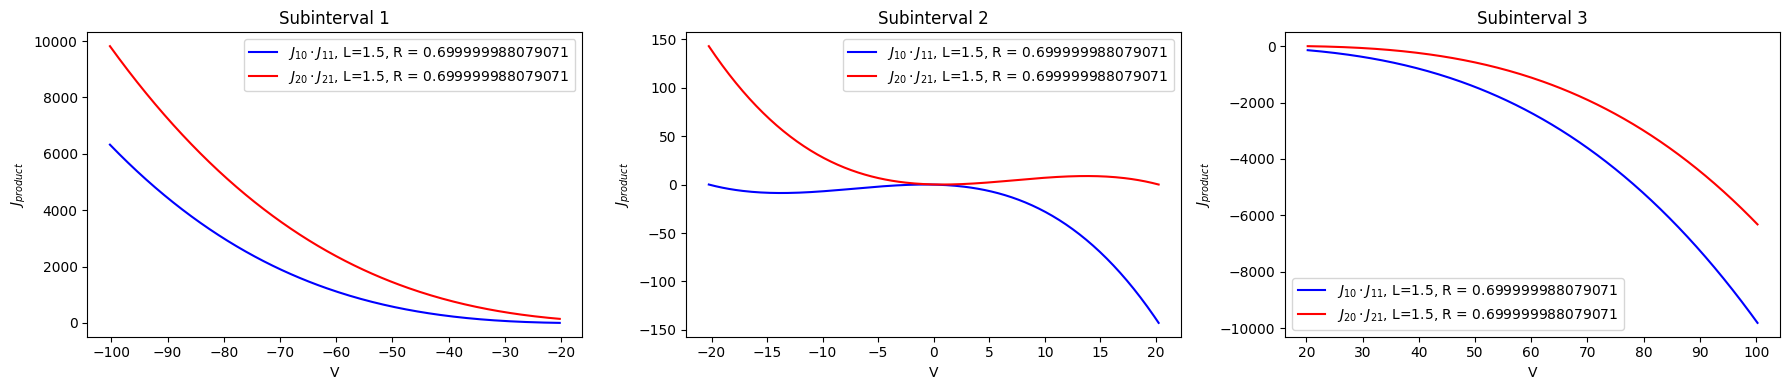

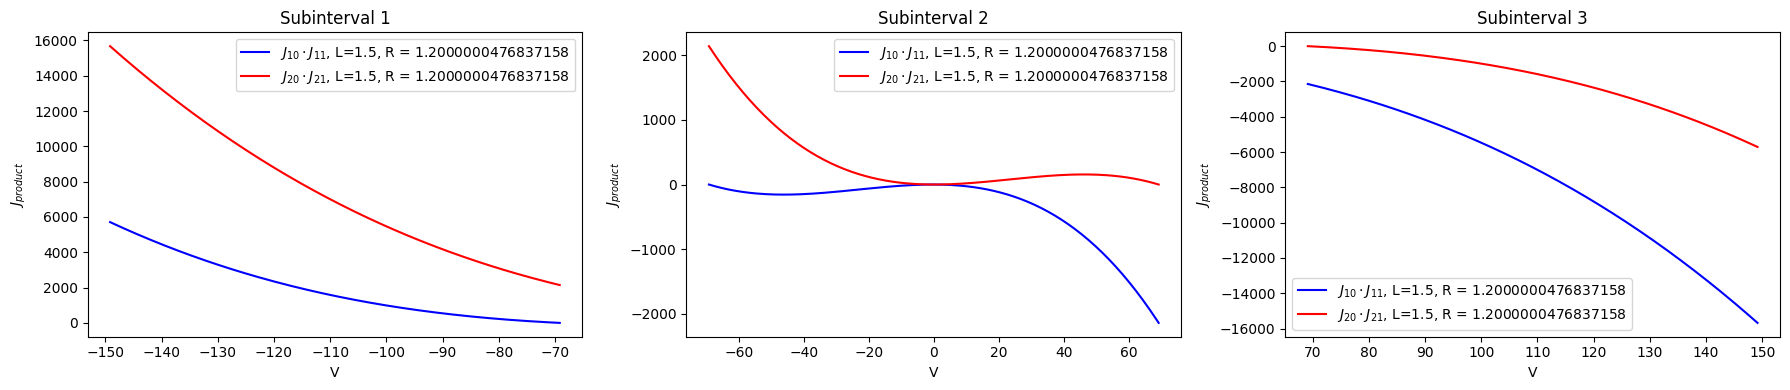

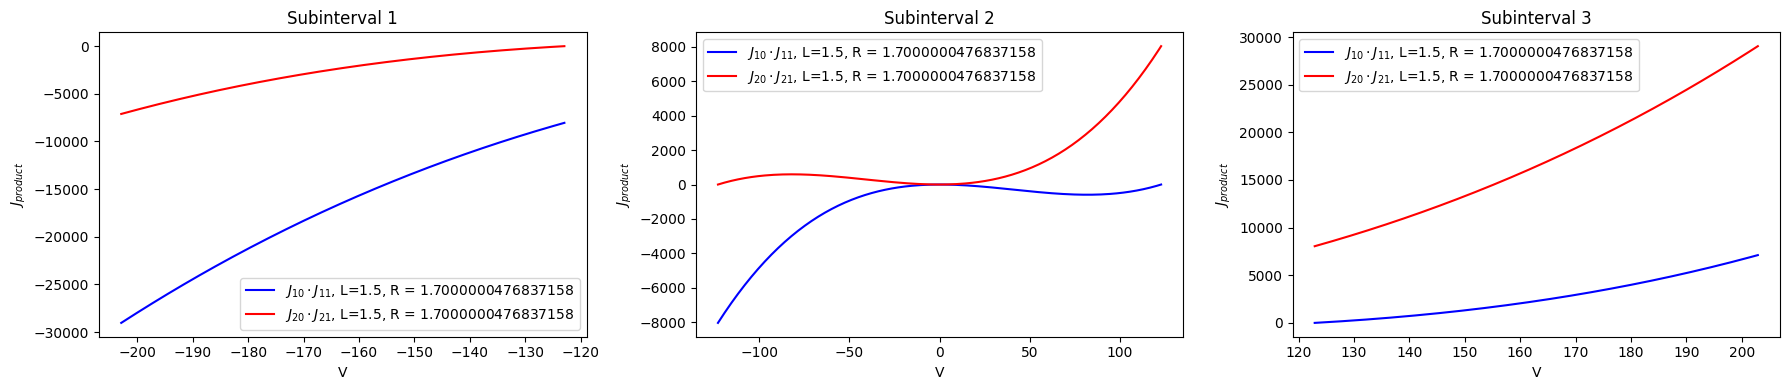

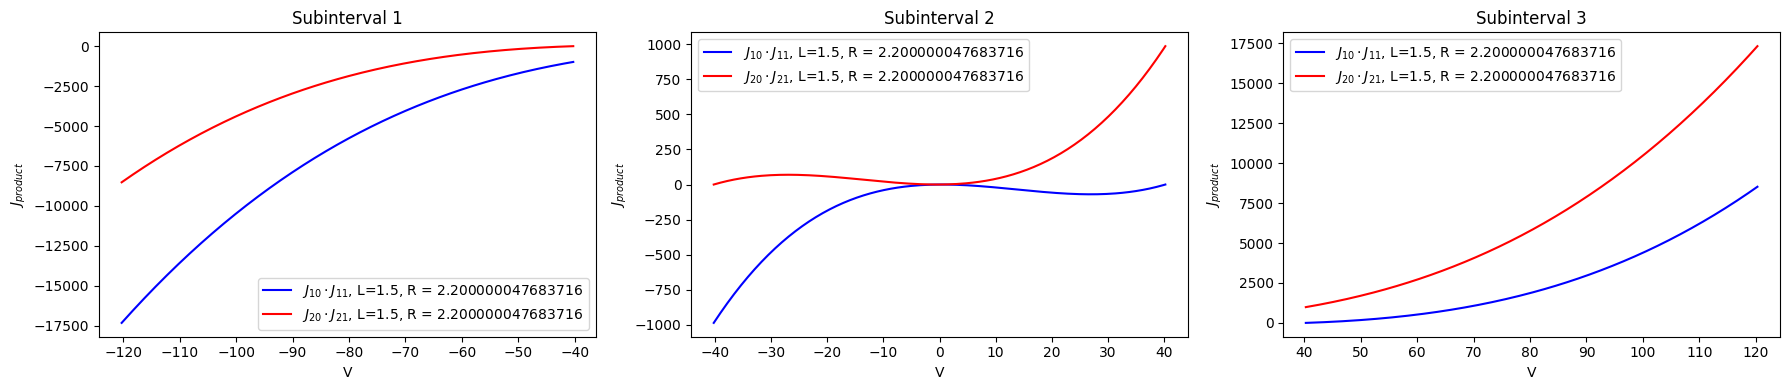

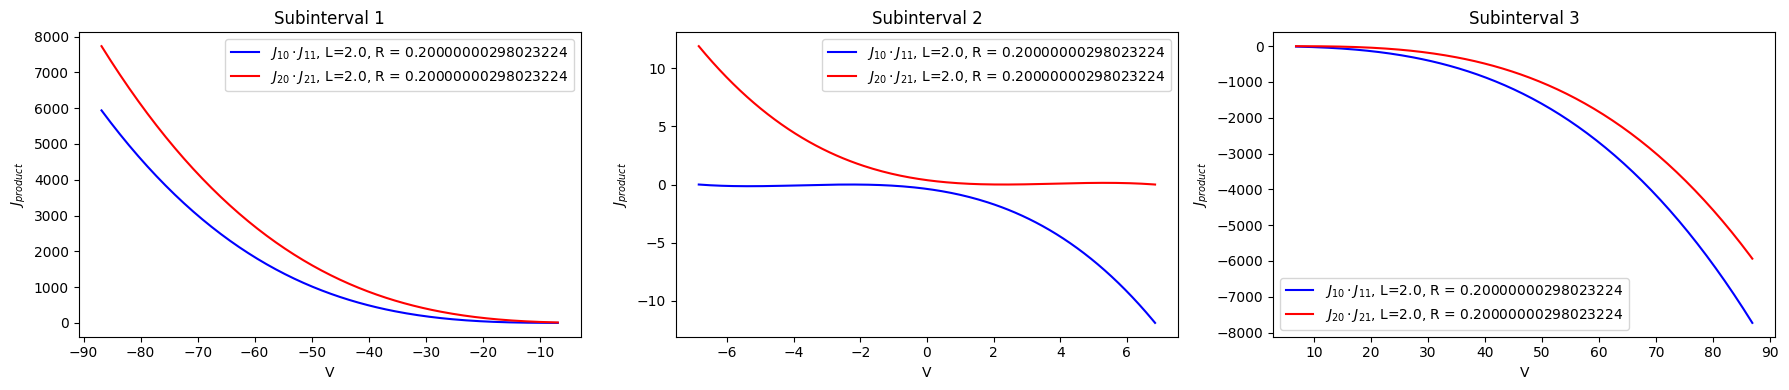

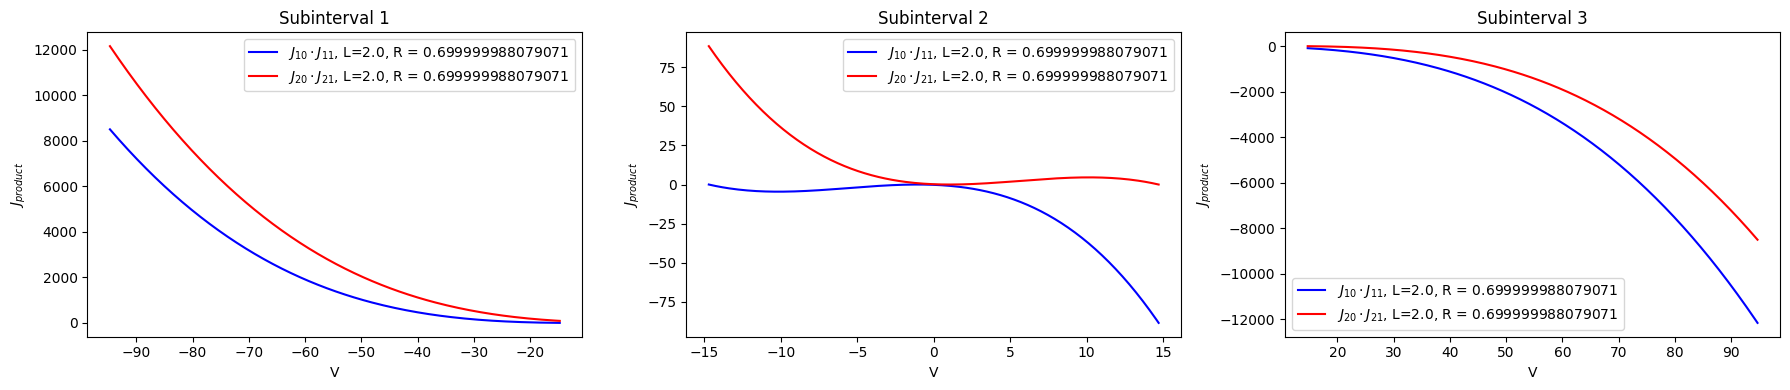

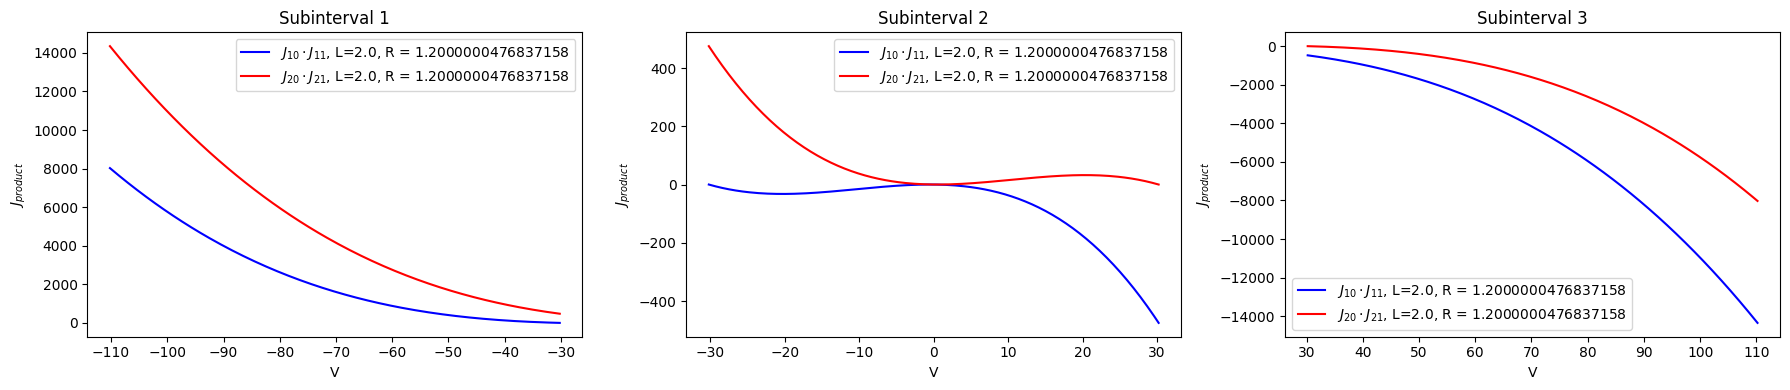

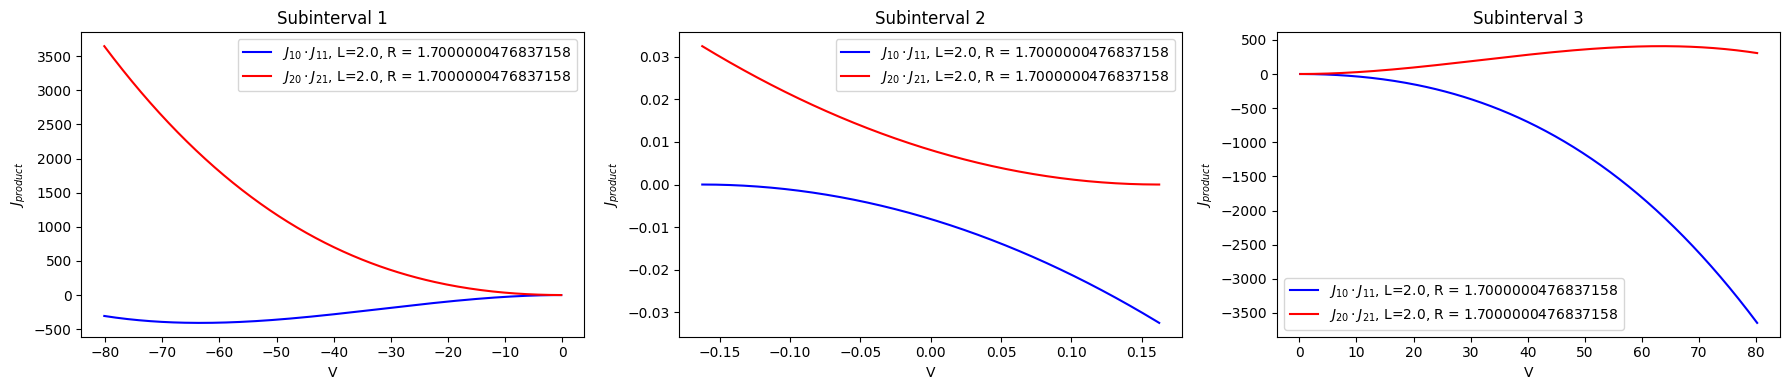

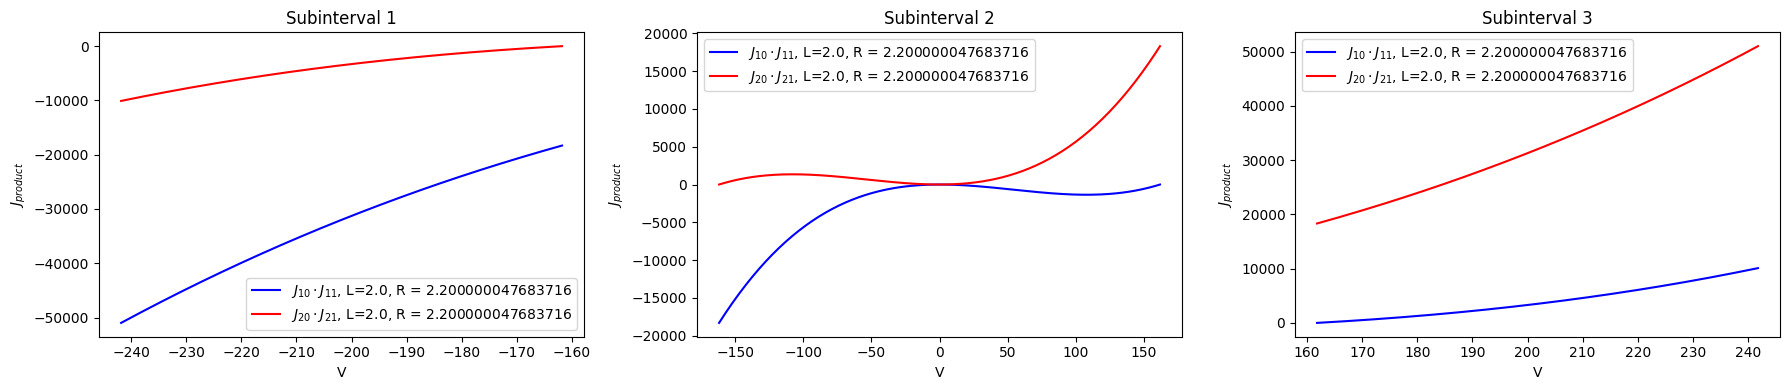

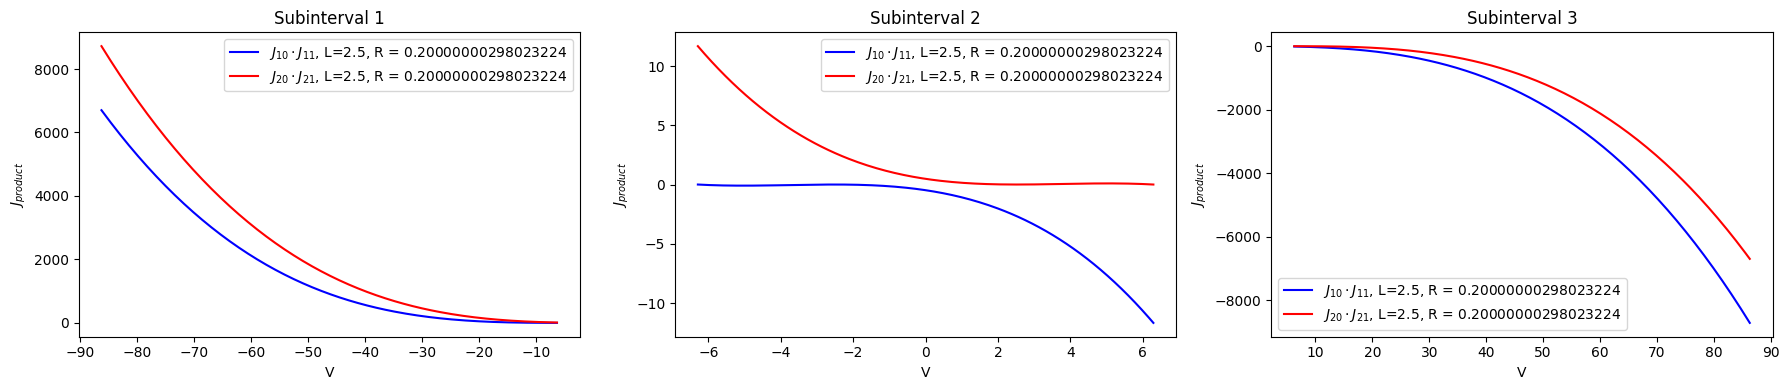

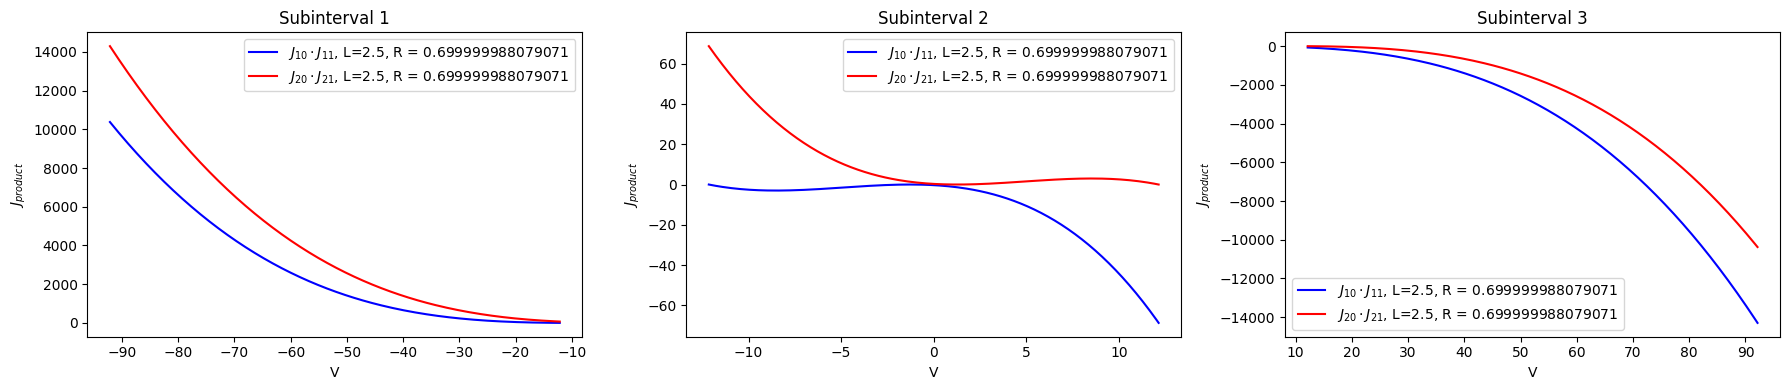

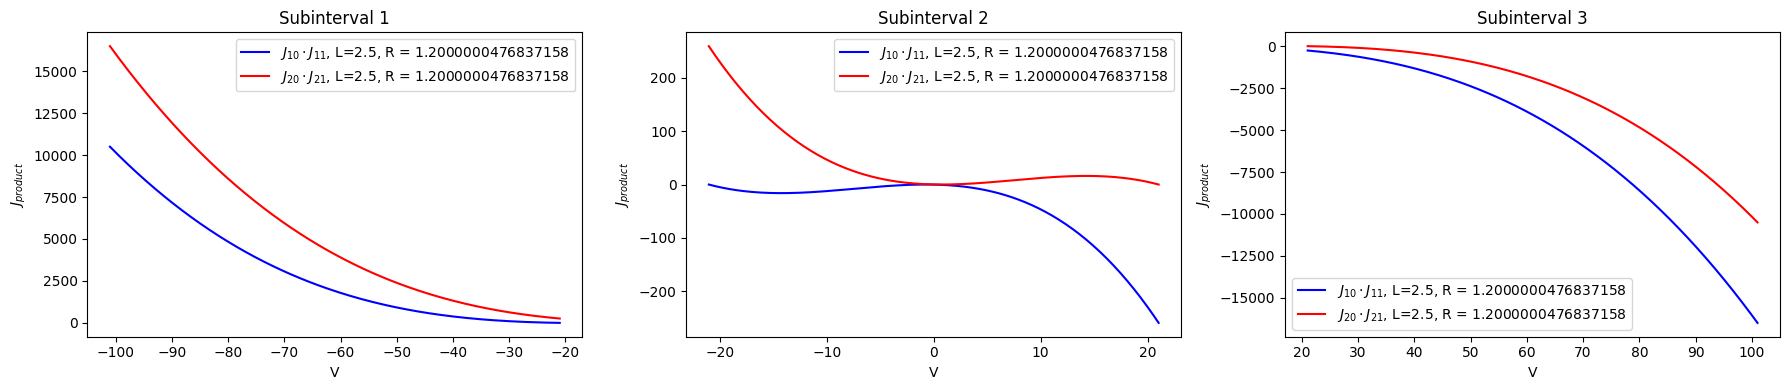

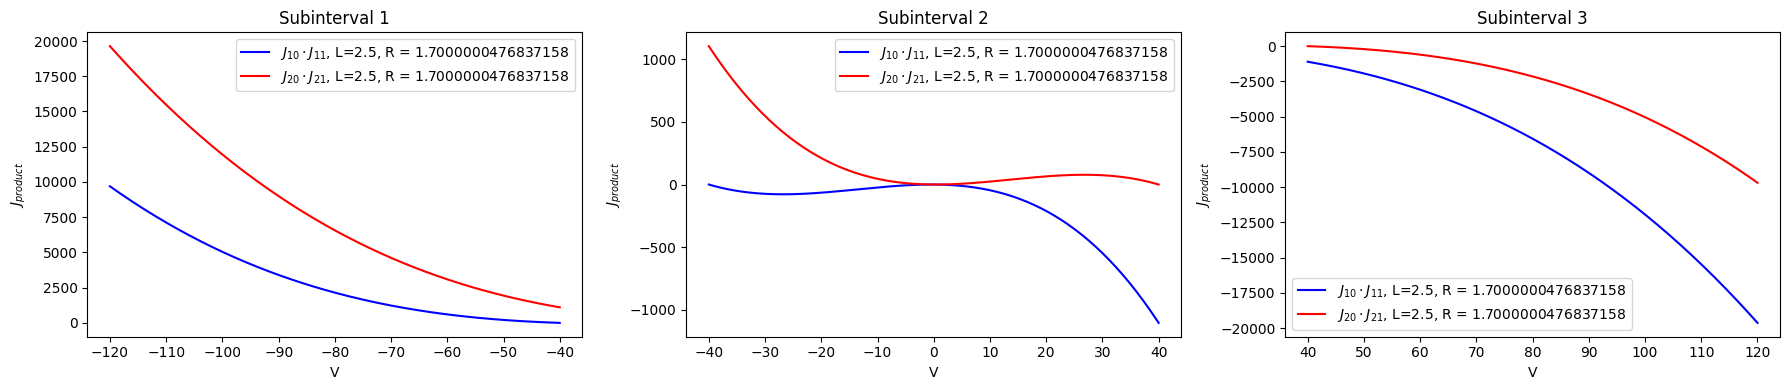

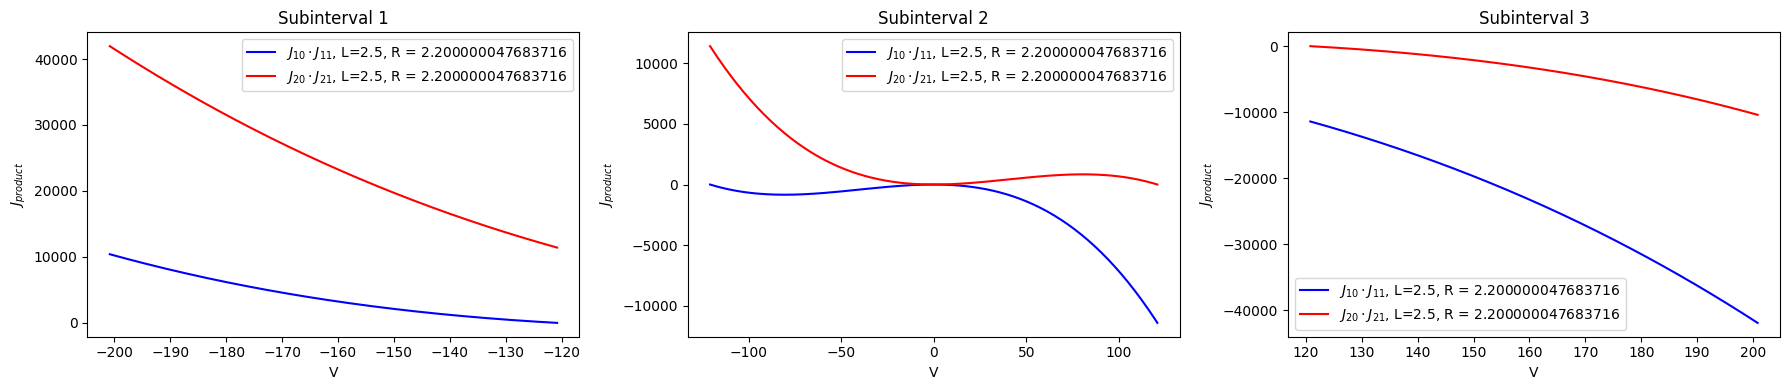

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Define the ranges for L and R
L_values = torch.linspace(0.5, 2.5, 5)
R_values = torch.linspace(0.2, 2.2, 5)

for i, L in enumerate(L_values):
    for j, R in enumerate(R_values):
        V_range = torch.linspace(-500, 500, int(1e7))  # Adjust the number of points as needed
        alpha, beta, z1, z2, V1_range, V2_range, V3_range = calculate_voltage_ranges(L, R)

        c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
        c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)

        J1_prd2 = J10 * J11
        J2_prd2 = J20 * J21

        # Find indices of zero values in J1_prd2 and J2_prd2
        epsilon = 1e-3  # Adjust this value as needed
        zero_indices1 = torch.where(torch.isclose(J1_prd2, torch.tensor(0.0), atol=epsilon))[0].cpu().numpy()
        zero_indices2 = torch.where(torch.isclose(J2_prd2, torch.tensor(0.0), atol=epsilon))[0].cpu().numpy()

        # Identify consecutive indices and keep one element per consecutive sequence
        def keep_one_per_consecutive(indices):
            result_indices = []
            i = 0
            while i < len(indices):
                j = i + 1
                while j < len(indices) and indices[j] == indices[j - 1] + 1:
                    j += 1
                result_indices.append(indices[i + (j - i) // 2])
                i = j
            return np.array(result_indices)

        # Keep one element per consecutive sequence in zero_indices1 and zero_indices2
        zero_indices1 = keep_one_per_consecutive(zero_indices1)
        zero_indices2 = keep_one_per_consecutive(zero_indices2)

        # Get corresponding values of V_range for zero values in J1_prd2 and J2_prd2
        V_zero_values1 = V_range[zero_indices1]
        V_zero_values2 = V_range[zero_indices2]

        # Combine the zero values
        V_combined = torch.cat([V_zero_values1, V_zero_values2])

        # Rearrange to have V_zero
        V_zero = torch.sort(V_combined)[0]

        # Find the length of V_zero
        lng = len(V_zero)

        # Create subintervals
        if len(V_zero) > 0:
            subintervals = [
                torch.linspace(V_zero[0] - 80, V_zero[0], 200)
            ] + [
                torch.linspace(V_zero[i], V_zero[i + 1], 200) for i in range(lng - 1)
            ] + [
                torch.linspace(V_zero[-1], V_zero[-1] + 80, 200)
            ]
        else:
            subintervals = [V_range[0], V_range[-1]]

        # Check the signs of J1_prd2 and J2_prd2 at the midpoints of subintervals
        midpoints = torch.tensor([torch.mean(interval) for interval in subintervals])
        signs_J1_prd2 = torch.sign(J10 * J11)
        signs_J2_prd2 = torch.sign(J20 * J21)

        # Check and remove points where both J1_prd2 and J2_prd2 have the same sign across consecutive subintervals
        new_V_zero = [V_zero[0]]
        for s in range(1, len(V_zero) - 1):
            idx = torch.searchsorted(midpoints, V_zero[s])
            if signs_J1_prd2[idx] != signs_J1_prd2[idx - 1] or signs_J2_prd2[idx] != signs_J2_prd2[idx - 1]:
                new_V_zero.append(V_zero[s])
        new_V_zero.append(V_zero[-1])

        # Update V_zero
        V_zero = torch.tensor(new_V_zero)

        # Update the length of V_zero
        lng = len(V_zero)

        # Create new subintervals using torch.linspace
        if len(V_zero) > 0:
            subintervals = [
                torch.linspace(V_zero[0] - 80, V_zero[0], 200)
            ] + [
                torch.linspace(V_zero[i], V_zero[i + 1], 200) for i in range(lng - 1)
            ] + [
                torch.linspace(V_zero[-1], V_zero[-1] + 80, 200)
            ]
        else:
            subintervals = [V_range[0], V_range[-1]]

        # Plot J1_prd2 and J2_prd2 on subintervals
        fig, axs = plt.subplots(1, lng + 1, figsize=(18, 4))

        # Plot J1_prd2 and J2_prd2 on subintervals
        for k, interval in enumerate(subintervals):
            start_point = interval[0]
            end_point = interval[-1]
            interval_range = torch.linspace(start_point, end_point, 200)
            c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(interval_range, alpha, beta, L, R, z1, z2)
            c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(interval_range, alpha, beta, L, R, z1, z2)

            J1_prd22 = J10 * J11
            J2_prd22 = J20 * J21

            axs[k].plot(interval_range, J1_prd22, color='blue', label=f'$J_{{10}} \cdot J_{{11}} $, L={L}, R = {R}')
            axs[k].plot(interval_range, J2_prd22, color='red', label=f'$J_{{20}} \cdot J_{{21}} $, L={L}, R = {R}')
            axs[k].set_title(f'Subinterval {k + 1}')
            axs[k].set_xlabel('V')
            axs[k].set_ylabel('$J_{product}$')
            axs[k].legend()

        # Adjust the spacing between subplots
        plt.tight_layout()

        # Display the figure
        plt.show()


In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a GPU available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")




# Define the ranges for L and R
L_values = torch.linspace(0.05, 1.95, 50)
#L_values = [0.05,  0.95, 1.05,  2]
R = 1

# Initialize matrices for signs_J1 and signs_J2
lenL = len(L_values)
num_subintervals = 50  

signs_J1 = torch.zeros((lenL, num_subintervals))
signs_J2 = torch.zeros((lenL, num_subintervals))
V_critic = torch.zeros((lenL, num_subintervals))

for i, L in enumerate(L_values):
    V_range = torch.linspace(-500, 500, int(1e7))  # Adjust the number of points as needed
    alpha, beta, z1, z2, V1_range, V2_range, V3_range = calculate_voltage_ranges(L, R)

    c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
    c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)
    J1_prd2 = J10 * J11
    J2_prd2 = J20 * J21

    # Find indices of values very close to zero in J1_prd2 and J2_prd2
    epsilon = 1e-3  # Adjust this value as needed
    zero_indices1 = torch.where(torch.isclose(J1_prd2, torch.tensor(0.0), atol=epsilon))[0]
    zero_indices2 = torch.where(torch.isclose(J2_prd2, torch.tensor(0.0), atol=epsilon))[0]

    # Identify consecutive indices and keep one element per consecutive sequence
    def keep_one_per_consecutive(indices):
        result_indices = []
        i = 0
        while i < len(indices):
            j = i + 1
            while j < len(indices) and indices[j] == indices[j - 1] + 1:
                j += 1
            result_indices.append(indices[i + (j - i) // 2])
            i = j
        return torch.tensor(result_indices)

    # Keep one element per consecutive sequence in zero_indices1 and zero_indices2
    zero_indices1 = keep_one_per_consecutive(zero_indices1)
    zero_indices2 = keep_one_per_consecutive(zero_indices2)

    # Get corresponding values of V_range for zero values in J1_prd2 and J2_prd2
    V_zero_values1 = V_range[zero_indices1]
    V_zero_values2 = V_range[zero_indices2]

    # Combine the zero values
    V_combined = torch.cat([V_zero_values1, V_zero_values2])

    # Rearrange to have V_zero
    V_zero = torch.sort(V_combined)[0]

    # Find the length of V_zero
    lng = len(V_zero)

    # Create subintervals
    if len(V_zero) > 0:
        subintervals = [
            torch.linspace(V_zero[0] - 80, V_zero[0], num_subintervals)
        ] + [
            torch.linspace(V_zero[i], V_zero[i + 1], num_subintervals) for i in range(lng - 1)
        ] + [
            torch.linspace(V_zero[-1], V_zero[-1] + 80, num_subintervals)
        ]
    else:
        subintervals = [V_range[0], V_range[-1]]

    # Check and remove points where both J1_prd2 and J2_prd2 have the same sign across consecutive subintervals
    new_V_zero = [V_zero[0]]
    for s in range(1, len(V_zero) - 1):
        idx = torch.searchsorted(midpoints, V_zero[s])
        if signs_J1_prd2[idx] != signs_J1_prd2[idx - 1] or signs_J2_prd2[idx] != signs_J2_prd2[idx - 1]:
            new_V_zero.append(V_zero[s])
    new_V_zero.append(V_zero[-1])

    # Update V_zero
    V_zero = torch.tensor(new_V_zero)

    # Update the length of V_zero
    lng = len(V_zero)

    # Create new subintervals using torch.linspace
    if len(V_zero) > 0:
        subintervals = [
            torch.linspace(V_zero[0] - 80, V_zero[0], num_subintervals)
        ] + [
            torch.linspace(V_zero[i], V_zero[i + 1], num_subintervals) for i in range(lng - 1)
        ] + [
            torch.linspace(V_zero[-1], V_zero[-1] + 80, num_subintervals)
        ]
    else:
        subintervals = [V_range[0], V_range[-1]]

    signs_J1_temp = torch.zeros(num_subintervals)
    signs_J2_temp = torch.zeros(num_subintervals)

    for k, interval in enumerate(subintervals):
        start_point = interval[0]
        end_point = interval[-1]
        interval_range = torch.linspace(start_point, end_point, num_subintervals)
        c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(interval_range, alpha, beta, L, R, z1, z2)
        c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(interval_range, alpha, beta, L, R, z1, z2)

        J1_prd22 = J10 * J11
        J2_prd22 = J20 * J21

        midpoint = (start_point + end_point) / 2
        # Find the index in interval_range closest to the midpoint
        mid_index = torch.abs(interval_range - midpoint).argmin()

        # Append the signs for the current L
        sign_J1_prd22 = torch.sign(J1_prd22[mid_index])
        sign_J2_prd22 = torch.sign(J2_prd22[mid_index])

        # Append the signs for the current L to the temporary arrays
        signs_J1_temp[k] = 1 if sign_J1_prd22 > 0 else -1
        signs_J2_temp[k] = 1 if sign_J2_prd22 > 0 else -1

    # Assign the temporary arrays to the i-th row of signs_J1 and signs_J2
    signs_J1[i, :] = signs_J1_temp
    signs_J2[i, :] = signs_J2_temp
    V_critic[i, :lng] = V_zero

# Create a matrix to store the heatmap values
Jsign_func = torch.zeros((lenL, len(V_range)))

for i in range(len(V_critic)):
    left_index = torch.searchsorted(V_range, V_critic[i, 0])
    Jsign_func[i, :left_index] = signs_J1[i, 0]
    for j in range(len(V_critic[i]) - 1):
        if (V_critic[i, j] == 0 and V_critic[i, j + 1] == 0):
            break
        # Find the indices corresponding to the current segment
        start_index = torch.searchsorted(V_range, V_critic[i, j])
        end_index = torch.searchsorted(V_range, V_critic[i, j + 1])

        # Assign values from S to the corresponding segment in H
        Jsign_func[i, start_index:end_index] = signs_J1[i, j + 1]
        if (V_critic[i, j] != 0 and V_critic[i, j + 1] == 0):
            right_index = torch.searchsorted(V_range, V_critic[i, j])
            Jsign_func[i, right_index:] = signs_J1[i, j + 1]

#for i in range(len(V_critic)):
  # Find the first nonzero element and its index from the left
#  left_nonzero_index = next((s for s, x in enumerate(Jsign_func[i,:]) if x != 0), None)
#  if left_nonzero_index is not None:
#      Jsign_func[i, :left_nonzero_index] = [Jsign_func[i, left_nonzero_index]] * left_nonzero_index

  # Find the first nonzero element and its index from the right
#  right_nonzero_index = next((s for s, x in enumerate(Jsign_func[i, ::-1]) if x != 0), None)
#  if right_nonzero_index is not None:
#      right_nonzero_index = len(Jsign_func[i,:]) - right_nonzero_index
#      Jsign_func[i, -right_nonzero_index:] = [Jsign_func[i, right_nonzero_index - 1]] * right_nonzero_index


/tmp/ipykernel_27/525592672.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  L = torch.tensor(L)
/tmp/ipykernel_27/3450909754.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  V = torch.tensor(V)
/tmp/ipykernel_27/3450909754.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  L = torch.tensor(L)
/tmp/ipykernel_27/3297110126.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  V = torch

/tmp/ipykernel_27/2886648570.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Jsign_func = torch.tensor(Jsign_func, device=device)
/opt/conda/lib/python3.10/site-packages/matplotlib/image.py:175: UserWarning: Data with more than 2**23 columns cannot be accurately displayed. Downsampling to less than 2**23 columns before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**23 columns'))


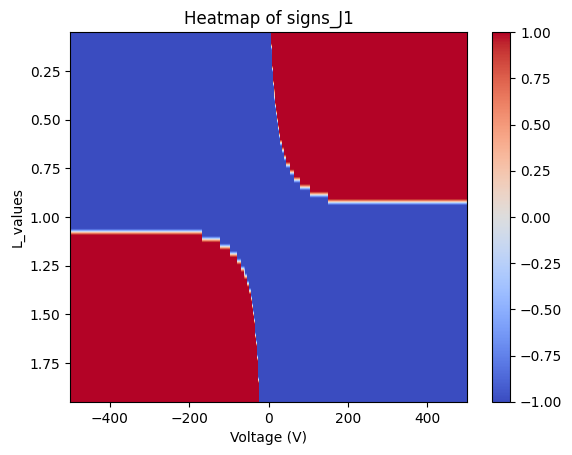

In [9]:
import torch
import matplotlib.pyplot as plt

# Assuming you have a GPU available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the tensor to GPU if available
Jsign_func = torch.tensor(Jsign_func, device=device)

# Plot the heatmap with specified color scale limits
plt.imshow(Jsign_func.cpu().numpy(), cmap='coolwarm', extent=[-500, 500, L_values[-1], L_values[0]], aspect='auto', vmin=-1, vmax=1)
# cmap='RdGy', cmap='seismic', cmap='bwr'
plt.xlabel('Voltage (V)')
plt.ylabel('L_values')
plt.title('Heatmap of signs_J1')
plt.colorbar()
plt.show()



/tmp/ipykernel_27/3450909754.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  V = torch.tensor(V)
/tmp/ipykernel_27/3297110126.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  V = torch.tensor(V)
/tmp/ipykernel_27/3450909754.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  alpha = torch.tensor(alpha)
/tmp/ipykernel_27/3450909754.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  

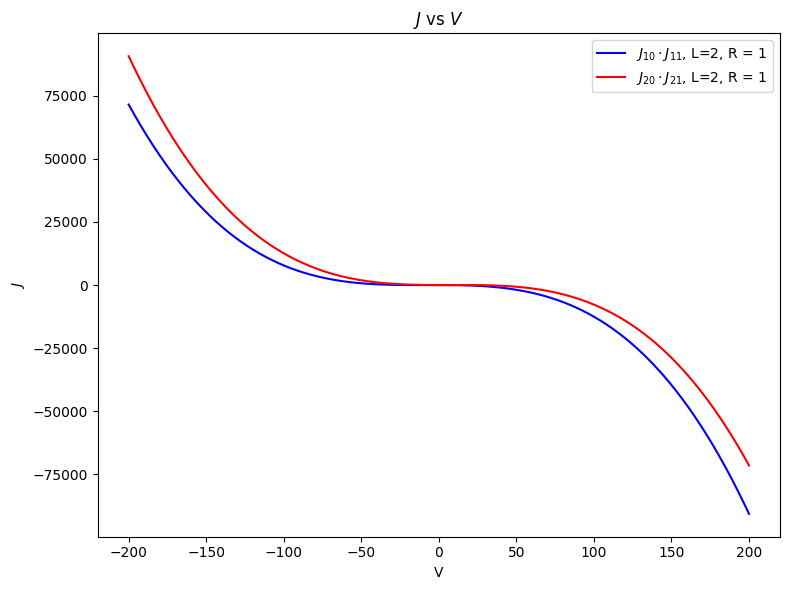

In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a GPU available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the parameters
L = 2
R = 1
# Define V range
V_range = torch.linspace(-200, 200, 400)  # Adjust the number of points as needed

# Calculate zeroth, first, and second order terms for the entire V_range
c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)

J1_prd2 = J10 * J11
J2_prd2 = J20 * J21

# Move tensors to GPU if available
V_range = torch.tensor(V_range, device=device)
J1_prd2 = torch.tensor(J1_prd2, device=device)
J2_prd2 = torch.tensor(J2_prd2, device=device)

# Create a figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot J1_product and J2_product on the same figure
ax.plot(V_range.cpu().numpy(), J1_prd2.cpu().numpy(), color='blue', label=f'$J_{{10}} \cdot J_{{11}}$, L={L}, R = {R}')
ax.plot(V_range.cpu().numpy(), J2_prd2.cpu().numpy(), color='red', label=f'$J_{{20}} \cdot J_{{21}}$, L={L}, R = {R}')
ax.set_xlabel('V')
ax.set_ylabel('$J$')

# Create a title and legend
title = '$J$ vs $V$'
ax.set_title(title)
ax.legend()

# Display the figure
plt.tight_layout()
plt.show()


In [11]:
 # Define the second order terms
def second_order_terms(V, alpha, beta, L, R, z1, z2):
    # Convert non-tensor variables to PyTorch tensors
    V = torch.tensor(V)
    alpha = torch.tensor(alpha)
    beta = torch.tensor(beta)
    L = torch.tensor(L)
    R = torch.tensor(R)
    z1 = torch.tensor(z1)
    z2 = torch.tensor(z2)
    # Constants
    H1 = 1.0
    phiL = V
    phiR = 0.0
    c1L  = L / z1
    c1R  = R / z1
    
    c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V, alpha, beta, L, R, z1, z2)
    c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V, alpha, beta, L, R, z1, z2)
   
    T0   = J10 +  J20
    T1   = J11 +  J21
    I1   = z1*J11 + z2*J21

    # Intermediate calculations
    A1 = -z1 * (c1L - c10a) / (alpha * H1 * (torch.log(c1L) - torch.log(c10a)))
    B1 = z1 * (c10b - c1R) / ((1 - beta) * H1 * (torch.log(c10b) - torch.log(c1R)))
    A2 = (z1 * z2 * (phi0a - phi0b) * (1 / z1 + (phiL - phi0a) / (torch.log(c1L) - torch.log(c10a))
       - (phiL - phi0a) * (c1L - c10a) / ((torch.log(c1L) - torch.log(c10a))**2 * c10a)))
    B2 = (z1 * z2 * (phi0a - phi0b) * (1 / z1 + (phi0b - phiR) / (torch.log(c10b) - torch.log(c1R))
       - (phi0b - phiR) * (c10b - c1R) / ((torch.log(c10b) - torch.log(c1R))**2 * c10b)))
    # Constants
    C1L = z1**2 * c11a + z2**2 * c21a
    C1R = z1**2 * c11b + z2**2 * c21b
    C2 = (z1 + z2) * (c10b**2 - c10a**2) / (12 * (z1 * (z1 - z2) * c10a * c10b)**2)
    I1_term = I1 * y1

    #Compute C:
    # First term
    C = -(C1L / (2 * z1 * (z1 - z2) * c10a)**2) + (C1R / (2 * (z1 * (z1 - z2) * c10b)**2)) + C2
    # Second term
    term2 = ((z1 - z2) * (L - R) * V * y1) / (H1 * (torch.log(L) - torch.log(R)) * c10a)
    term2 -= (z2 * alpha * (phi0b - phi0a) / (z1 - z2)) - (c10a * (phi0a - phi0b) / (H1 * T0)) - (1 / (z1 - z2))
    # Third term
    term3 = (0.5 * z2 * V / (z1 * (z1 - z2)**2 * (torch.log(L) - torch.log(R)))) * (1 / c10a**2 - 1 / c10b**2)
    # Fourth term
    term4 = (z1 * z2 * (phi1a - phi1b) * V / (torch.log(L) - torch.log(R)))
    term4 *= (1 / (z1 * (z1 - z2))) * (alpha / c10a + (1 - beta) / c10b) + y0 / H1
    # Fifth term
    term5 = (0.5 * z1**2 * z2**2 * V * (T0 * y1 + T1 * y0)**2 / (torch.log(L) - torch.log(R)))
    # Sixth term
    term6 = (z1 * z2 * V * (phi0a - phi0b) * y0 / (H1 * c10a * (torch.log(L) - torch.log(R))))
    term6 *= z2 * alpha * (phi0b - phi0a) / (z1 - z2) - 1 / (z1 - z2)
    # Seventh term
    term7 = (J11 * V / (z1 * T0 * (torch.log(L) - torch.log(R)))) * (1 / c10b - 1 / c10a)
    # Eighth term
    term8 = (J10 * (phi0a - phi0b) * V / (z1 * T0**2 * H1 * (torch.log(L) - torch.log(R)))) * (1 / c10b - 1 / c10a)
    # Combine all terms
    C += term2 + term3 - term4 - term5 + term6 + term7 + term8

    # Calculate c12a, c22a, c12b, c22b
    c12a = (-((z1 + 4 * z2) / (24 * z1 * (z1 - z2)**2 * c10a)) -
         ((phi0a - phi0b) * alpha * z2) / (z1 - z2))
    c22a = ((4 * z1 + z2) / (24 * z1 * (z1 - z2)**2 * c10a) +
         ((phi0a - phi0b) * alpha * z1) / (z1 - z2))
    c12b = (-((z1 + 4 * z2) / (24 * z1 * (z1 - z2)**2 * c10b)) +
         ((phi0a - phi0b) * (1 - beta) * z2) / (z1 - z2))
    c22b = ((4 * z1 + z2) / (24 * z1 * (z1 - z2)**2 * c10b) -
         ((phi0a - phi0b) * (1 - beta) * z1) / (z1 - z2))

    # Calculate phi2a, phi2b
    phi2a = ((B1 * C - (z1 - z2) * y0 * B1 * A2 - z2 * y0 * B1 * (phi1b - phi1a) / H1 +
           B2 - A2) / (A1 - B1 + (z1 - z2) * y0 * A1 * B1))
    phi2b = ((1 - (z1 - z2) * y0 * A1) * phi2a + C - (z1 - z2) * y0 * A2 - z2 * y0 * (phi1b - phi1a) / H1)


    y2 = (y0 * (phi1a - phi1b) / (H1 * T0) - (y1 / c10a) * (z2 * alpha * (phi0b - phi0a) / (z1 - z2) -
    (c10a * (phi0a - phi0b) / (H1 * T0)) - 1 / (z1 - z2)) +
    (0.5 / (z1**2 * (z1 - z2)**2 * T0)) * (1 / c10a**2 - 1 / c10b**2) +
    ((phi1a - phi1b) / (z1 * (z1 - z2) * T0)) * (alpha / c10a + (1 - beta) / c10b) -
    (z1 * z2 / (2 * T0)) * (T0 * y1 + T1 * y0)**2 +
    (((phi0a - phi0b) * y0) / (H1 * T0 * c10a)) * ((z2 * alpha * (phi0b - phi0a) / (z1 - z2)) - 1 / (z1 - z2)) +
    (J11 / (z1**2 * z2 * T0**2)) * (1 / c10b - 1 / c10a) +
    (J10 * (phi0a - phi0b) / (z1**2 * z2 * T0**3 * H1)) * (1 / c10b - 1 / c10a)
    )




    # Calculate J12:
    J12_term1 = (z1 * z2 * (phi1a - phi1b) / (H1 * (z1 - z2)))
    J12_term1 *= ((1 / z1) + (phiL - phi0a) / (torch.log(c1L) - torch.log(c10a)) - (phiL - phi0a) * (c1L - c10a) / ((torch.log(c1L) - torch.log(c10a))**2 * c10a))

    J12_term2 = z1 * (c1L - c10a) / (alpha * H1 * (torch.log(c1L) - torch.log(c10a)))
    J12_term2 *= (phi2a + z1 * z2 * alpha * (phi0b - phi0a) / (2 * (z1 * (z1 - z2) * c10a)**2) - (z1 + z2) / (6 * (z1 * (z1 - z2) * c10a)**2))

    J12_term3 = z1 * z2 * (phi0a - phi0b) / (H1 * (torch.log(c1L) - torch.log(c10a)) * (z1 - z2)**2)
    J12_term3 *= (z1 - z2) * phi1a - ( (z1 - z2) * (c1L - c10a) * phi1a / ((torch.log(c1L) - torch.log(c10a)) * c10a) ) - 1 / (2 * z1 * c10a) + (c1L - c10a) / (2 * z1 * (torch.log(c1L) - torch.log(c10a)) * (c10a**2)) + z2 * (c11a + c21a) * (phiL - phi0a) * (c1L + c10a) / (2 * (torch.log(c1L) - torch.log(c10a)) * (c10a**2))

    J12 = J12_term1 - J12_term2 - J12_term3

    # Calculate J22:
    J22_term1 = (z1 * z2 * (phi1a - phi1b) / (H1 * (z2 - z1)))
    J22_term1 *= ((1 / z2) + (phiL - phi0a) / (torch.log(c1L) - torch.log(c10a)) - (phiL - phi0a) * (c1L - c10a) / ((torch.log(c1L) - torch.log(c10a))**2 * c10a))

    J22_term2 = z1 * (c1L - c10a) / (alpha * H1 * (torch.log(c1L) - torch.log(c10a)))
    J22_term2 *= (phi2a + z1 * z2 * alpha * (phi0b - phi0a) / (2 * (z1 * (z1 - z2) * c10a)**2) - (z1 + z2) / (6 * (z1 * (z1 - z2) * c10a)**2))

    J22_term3 = z1 * z2 * (phi0a - phi0b) / (H1 * (torch.log(c1L) - torch.log(c10a)) * (z1 - z2)**2)
    J22_term3 *= (z1 - z2) * phi1a - (z1 - z2) * (c1L - c10a) * phi1a / ((torch.log(c1L) - torch.log(c10a)) * c10a) - 1 / (2 * z1 * c10a) + (c1L - c10a) / (2 * z1 * (torch.log(c1L) - torch.log(c10a)) * (c10a**2))+  (z2 * (c11a + c21a) * (phiL - phi0a) * (c1L + c10a) / (2 * (torch.log(c1L) - torch.log(c10a)) * (c10a**2)))

    J22 = J22_term1 + J22_term2 + J22_term3


    return c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22


#result = second_order_terms(V, alpha, beta, L, R, z1, z2)
#print(result)
